<a href="https://colab.research.google.com/github/RiyaBhurse/LogisticRegression/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

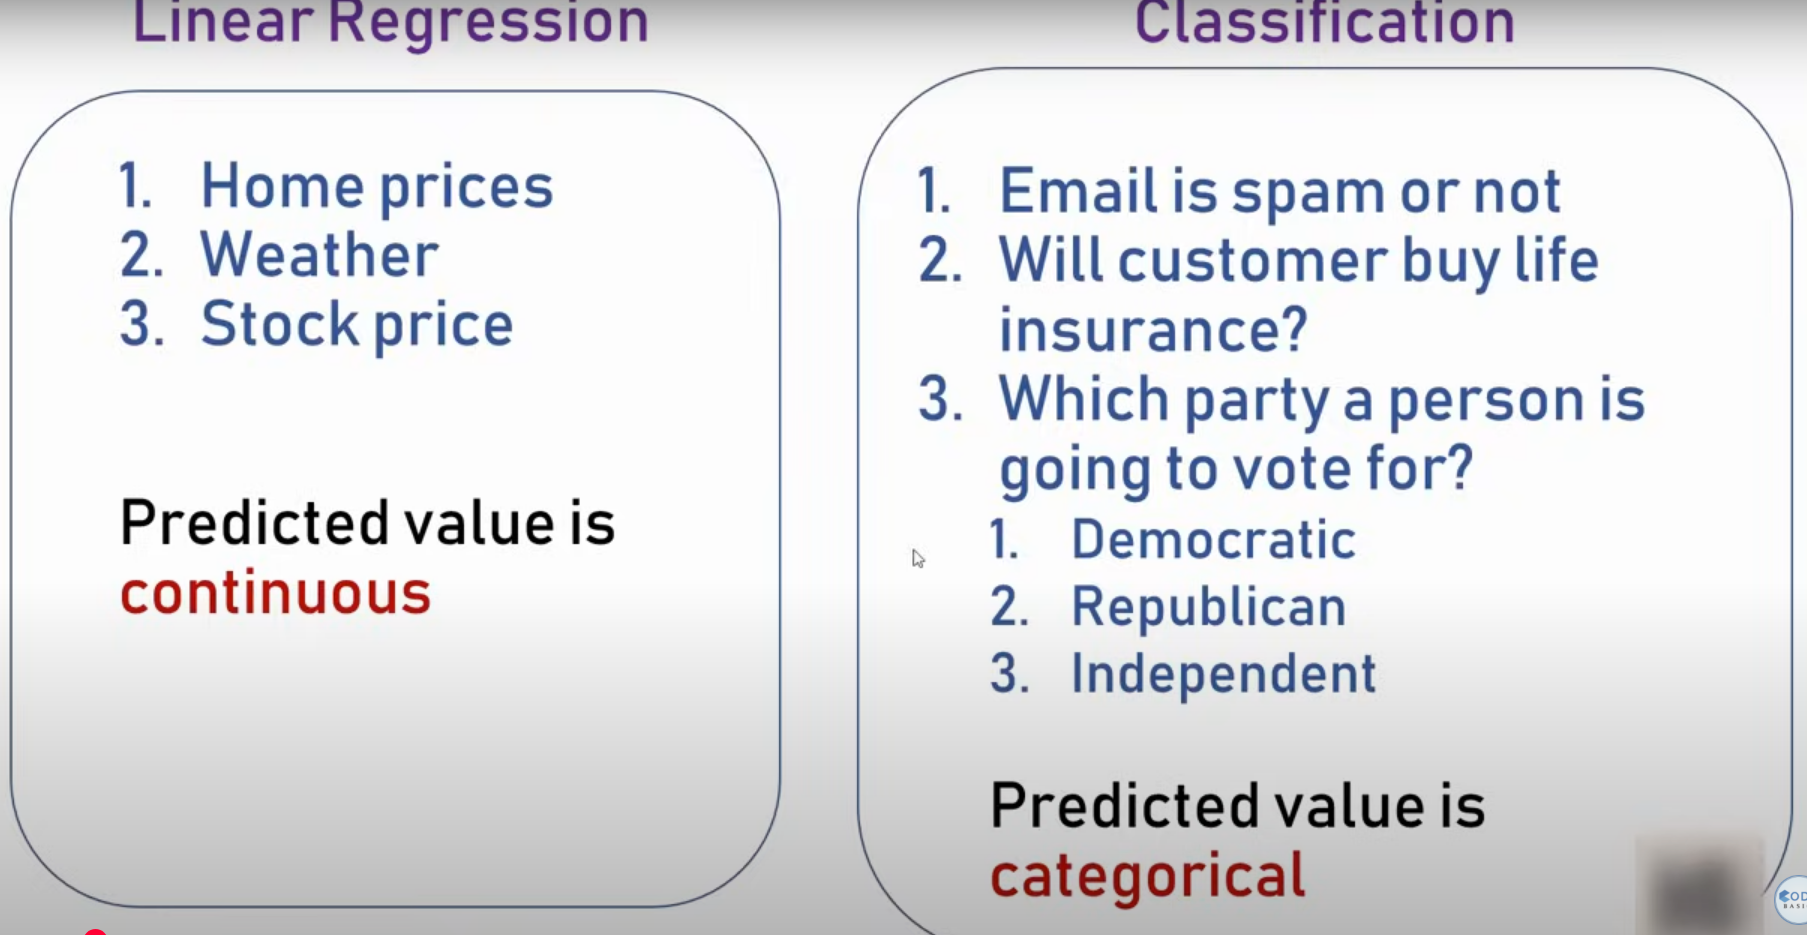

***Logistic Regression is one of the techinique used for Regression problem***

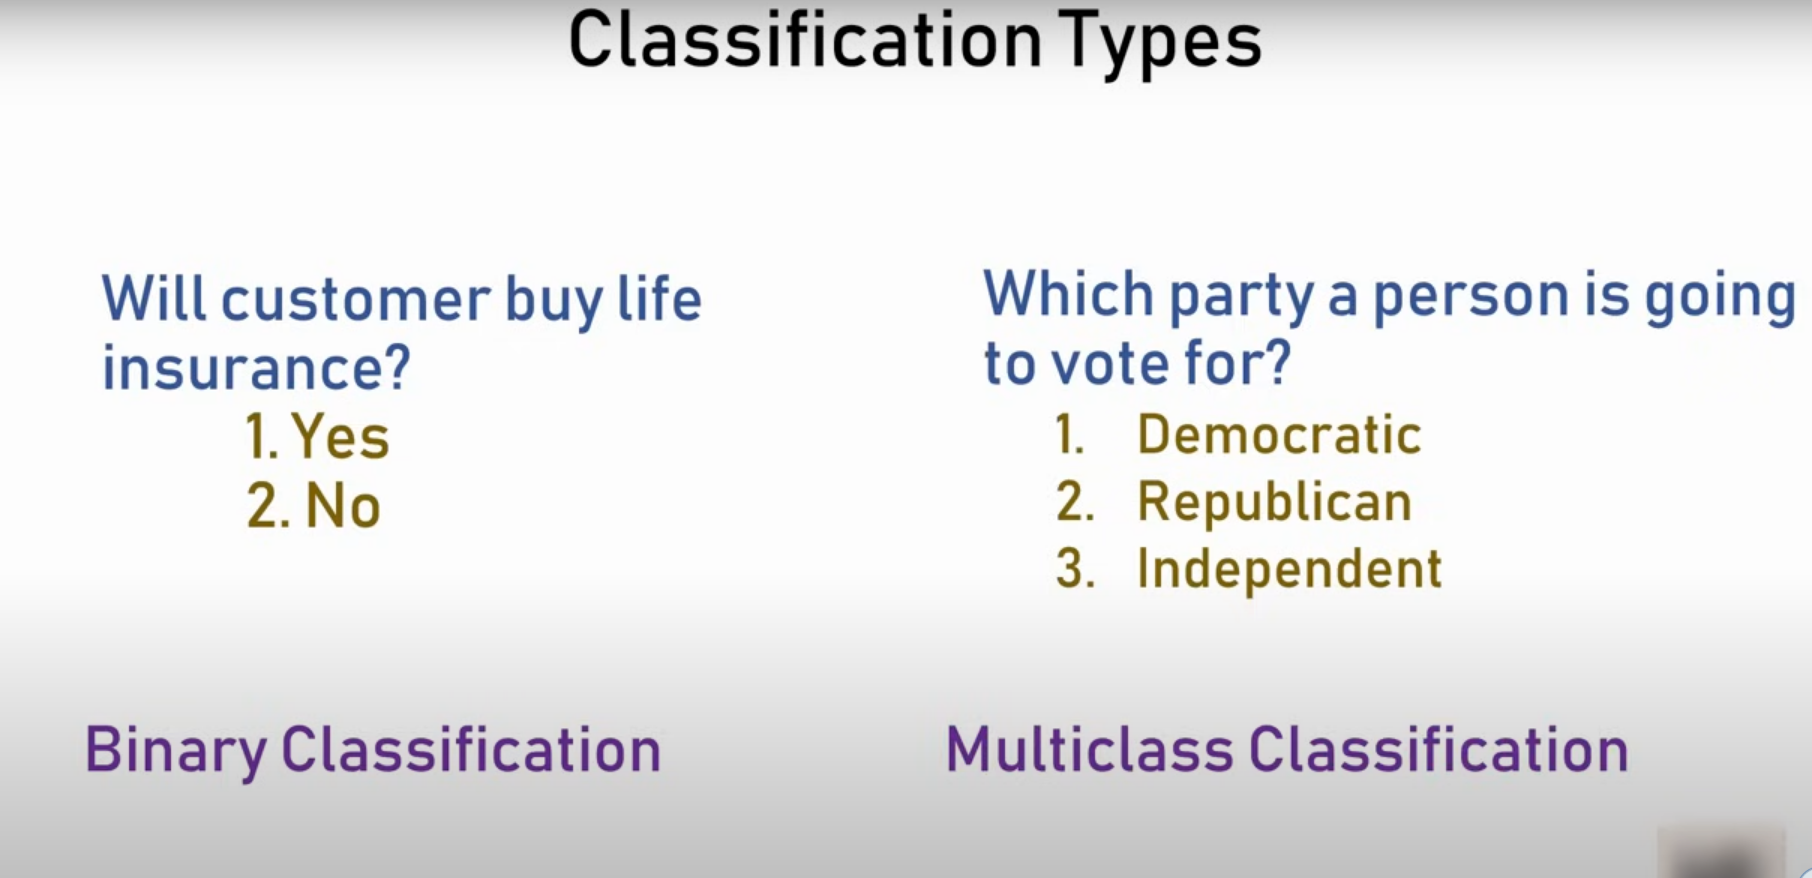

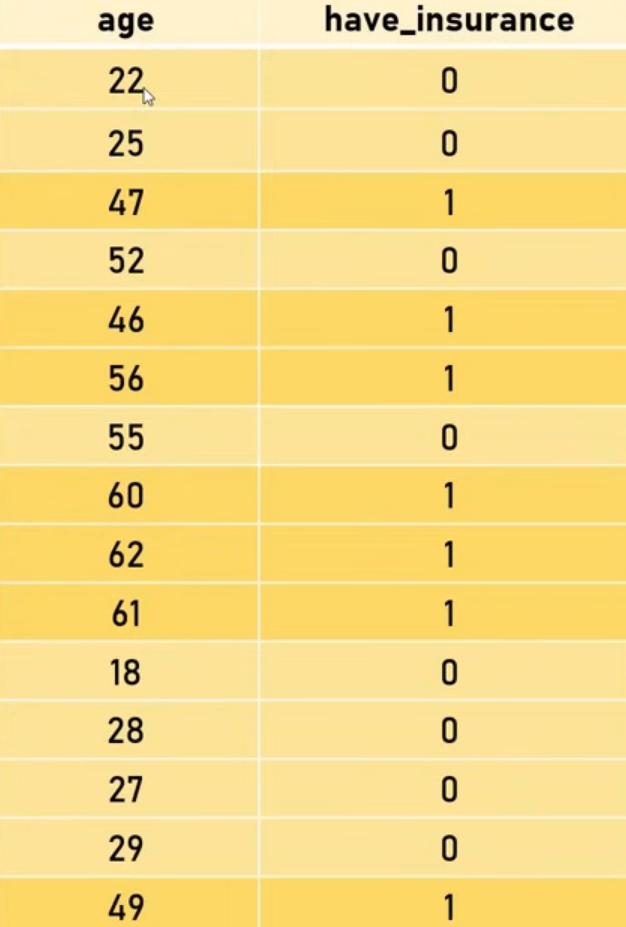

If you are supposed to predict if a person is going to purchase the insurance or not! Then first thing you would do it plot a scatter plot and do the visual
analysis

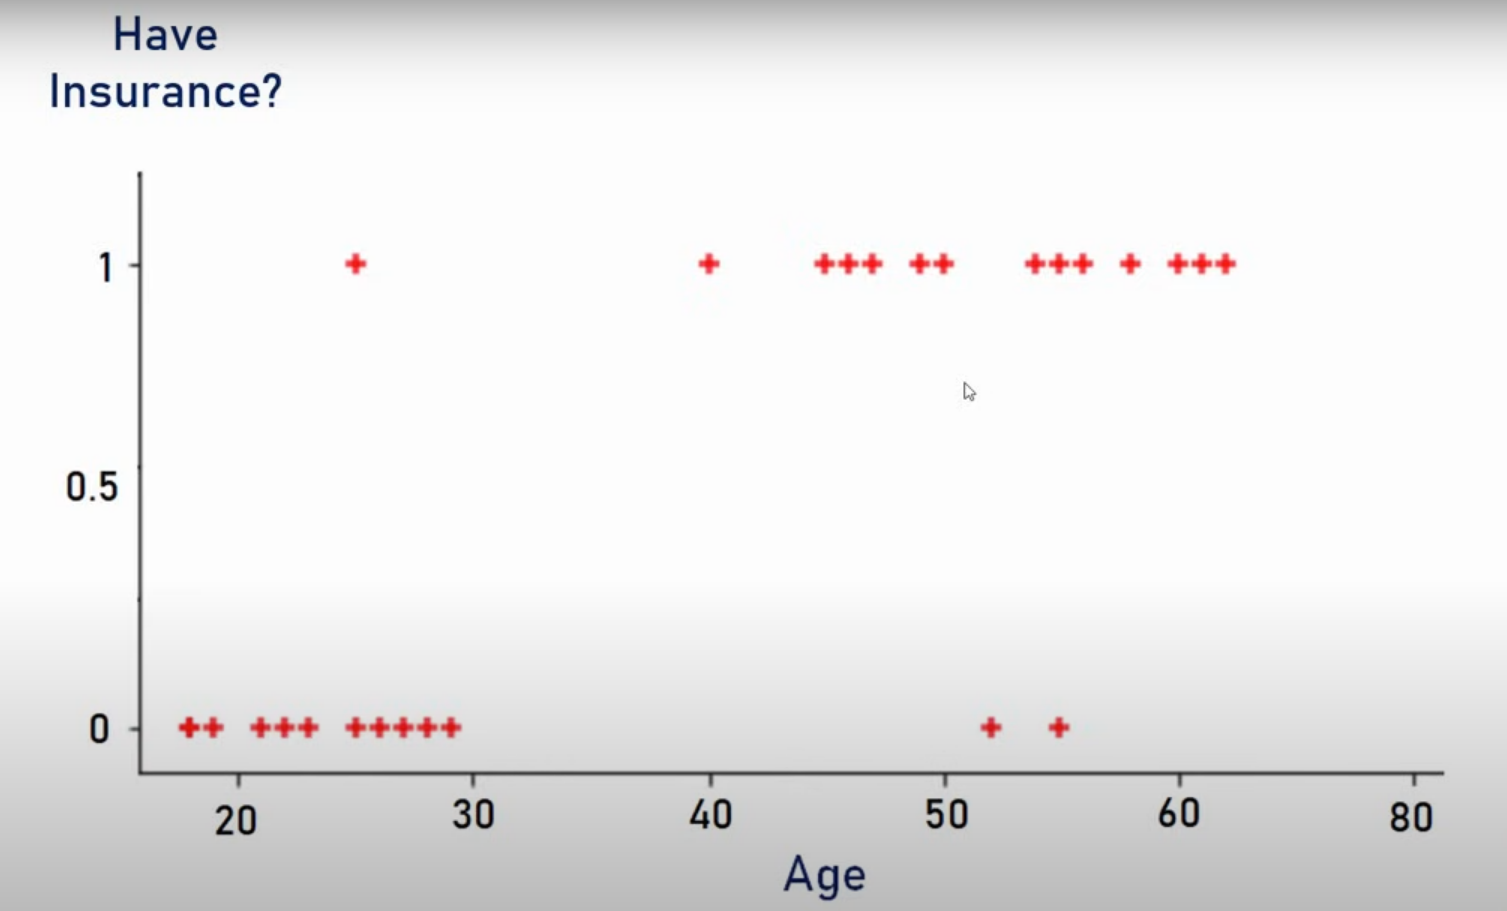

Then you'll draw a linear regression line, If the predicted line is more than 0.5 then we will say yes a person would buy the insurance or else no!

Anything on right side is yes on left side is no



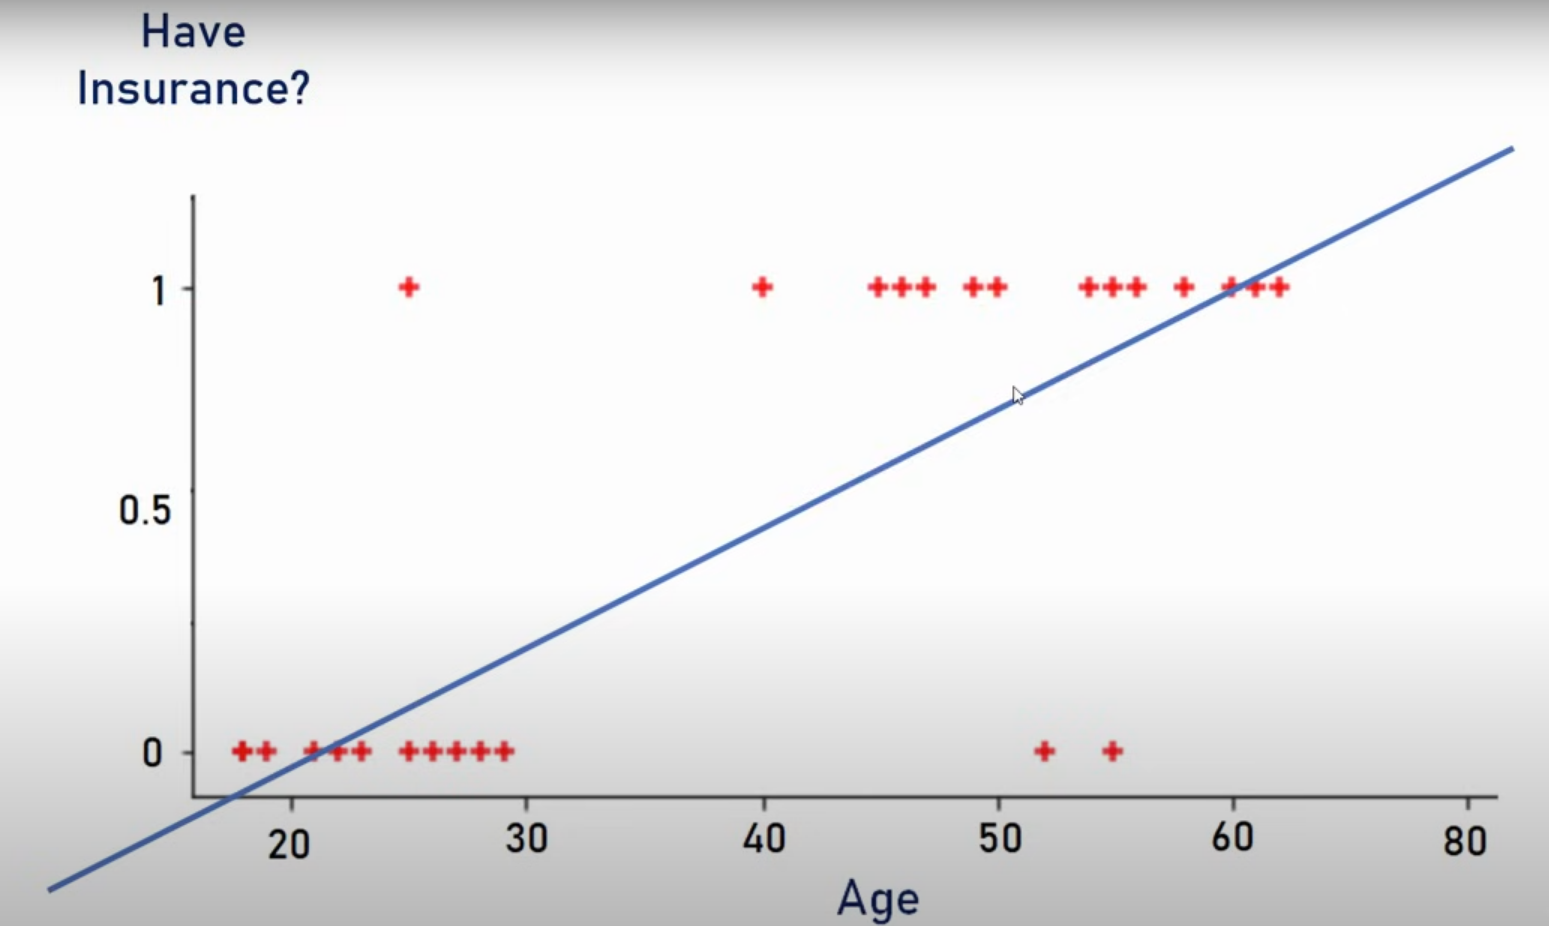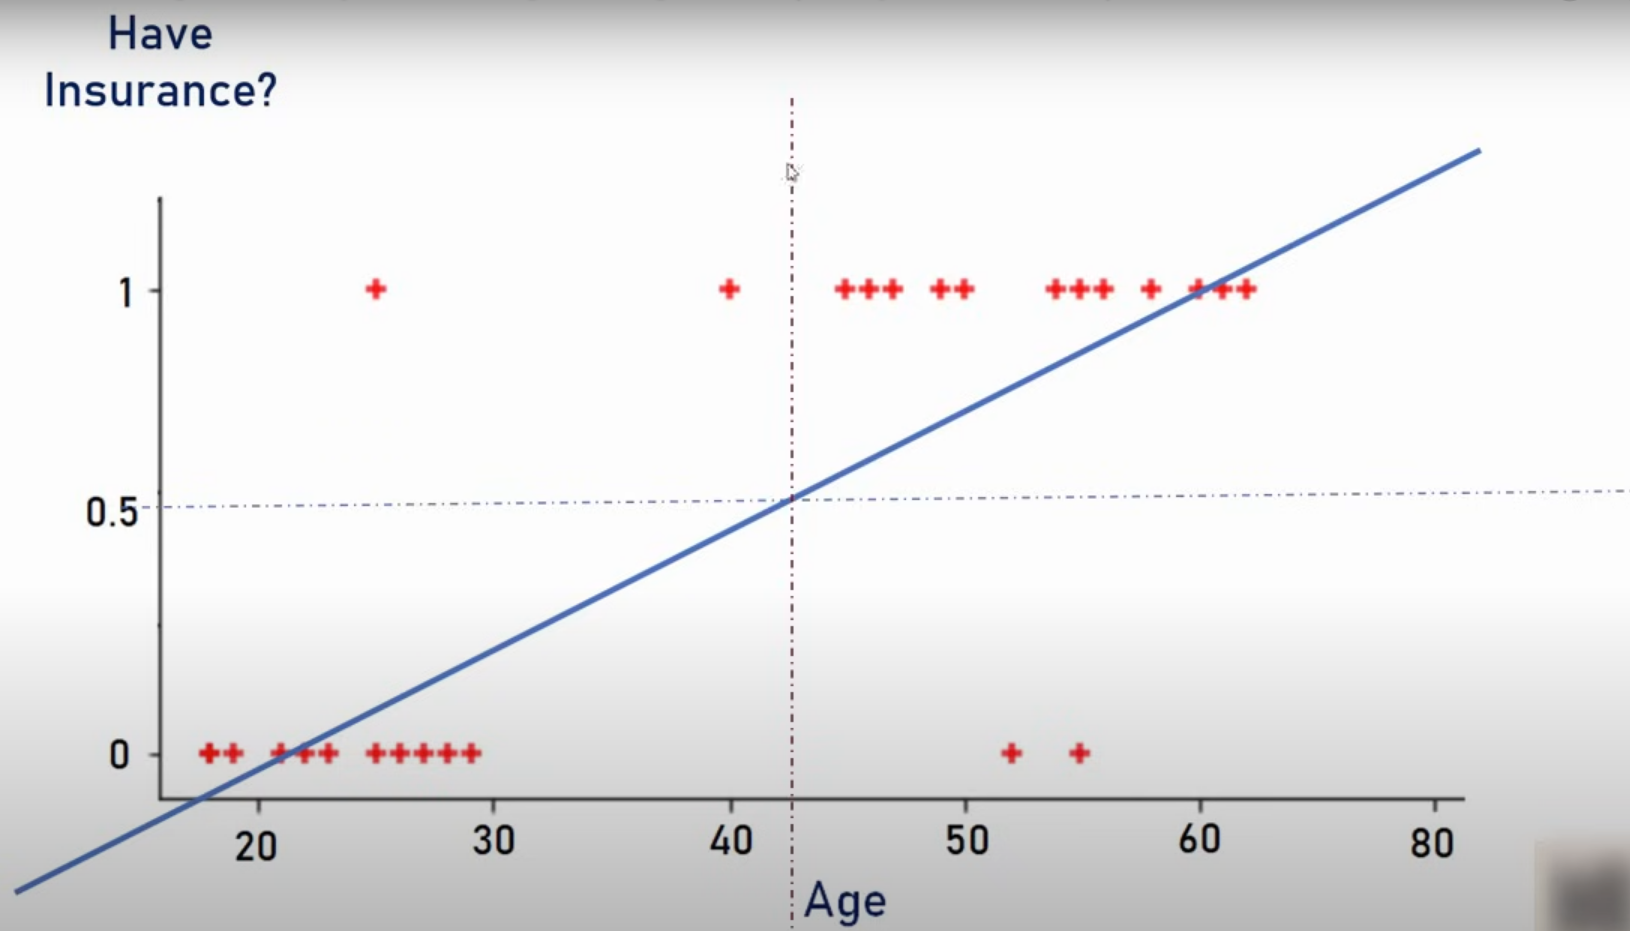

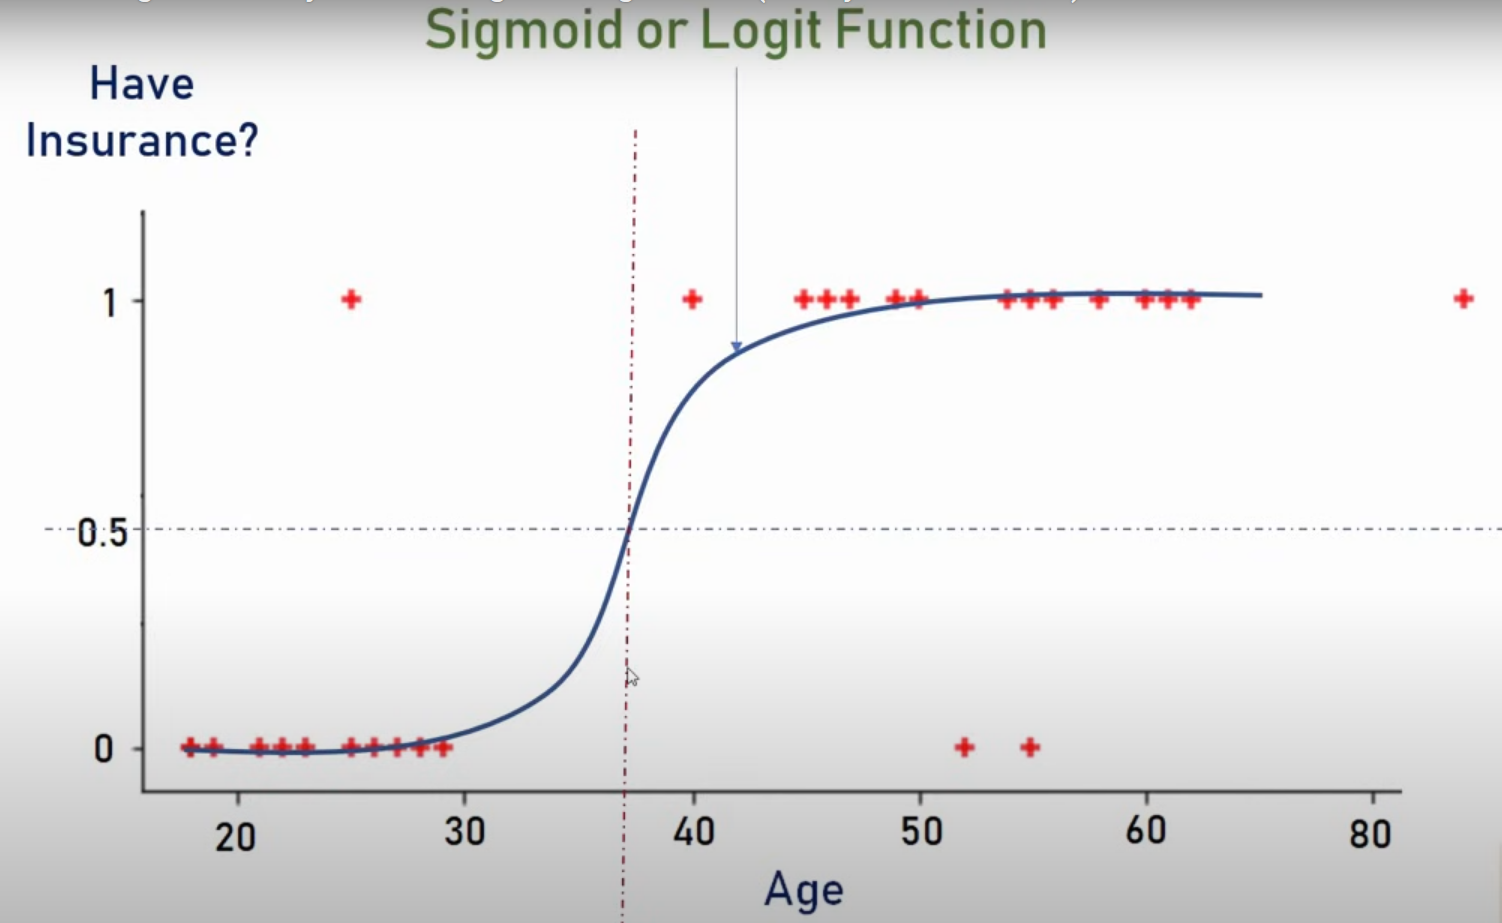

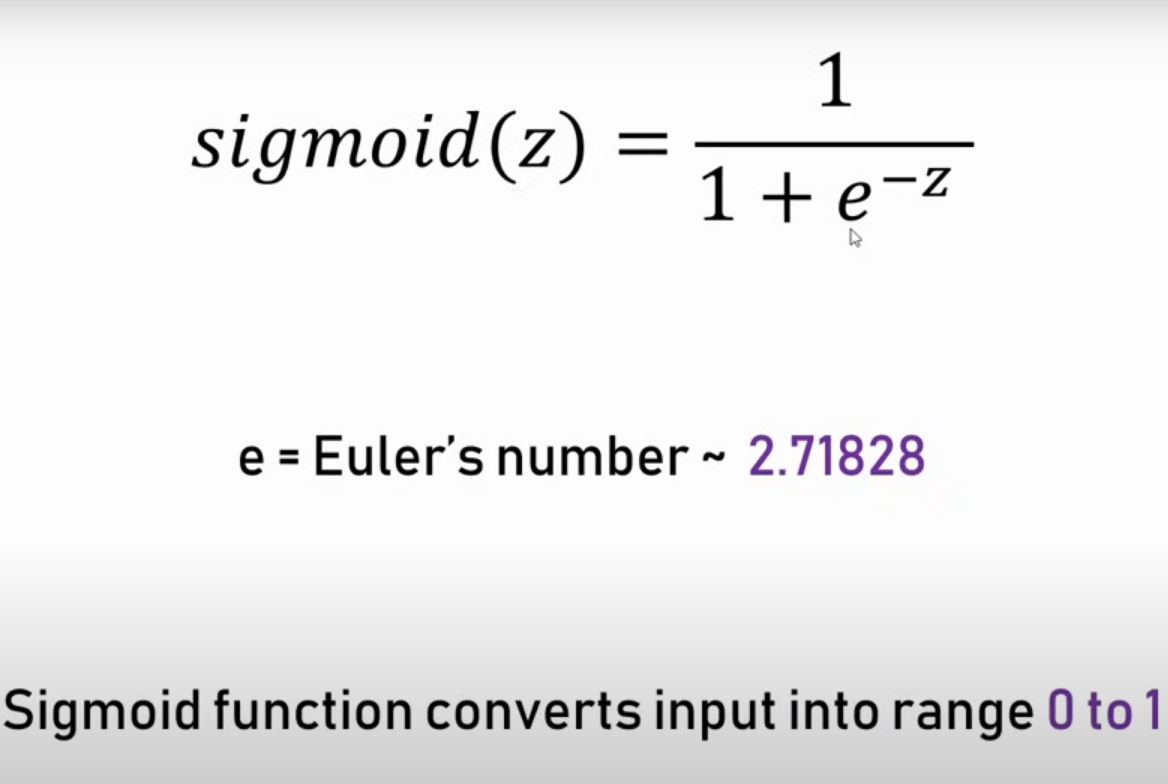

Sigmoid function comes up with a range!!
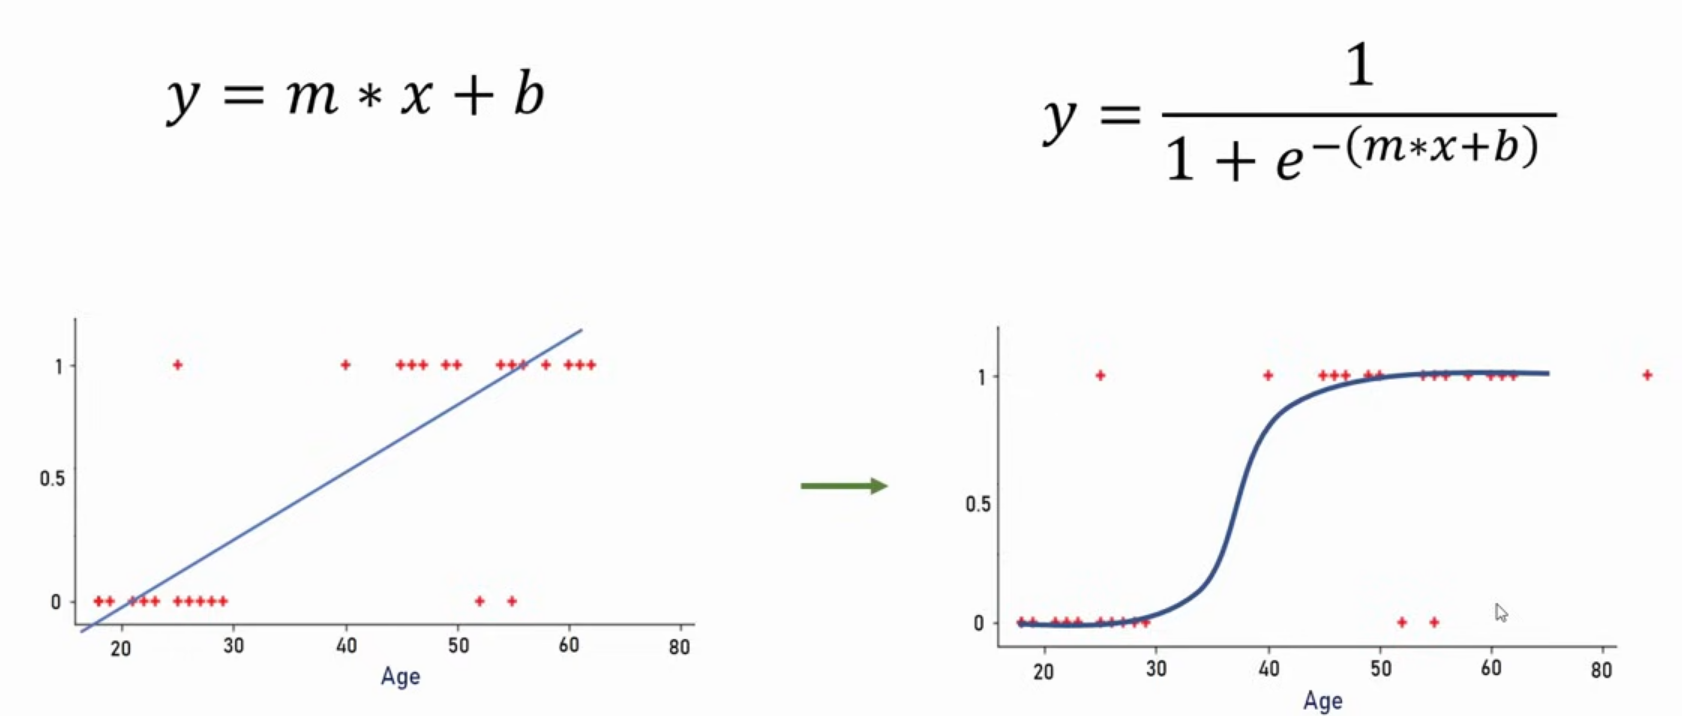

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('similar_insurance_data.csv')

In [4]:
df

age  bought_insurance
0    22                 0
1    25                 0
2    47                 1
3    52                 0
4    46                 1
5    56                 1
6    55                 0
7    60                 1
8    62                 1
9    61                 1
10   18                 0
11   28                 0
12   27                 0
13   29                 0
14   49                 1
15   55                 1
16   25                 1
17   58                 1
18   19                 0
19   18                 0
20   21                 0
21   26                 0
22   40                 1
23   45                 1
24   50                 1
25   54                 1
26   23                 0
27   58                 0
28   25                 0
29   19                 0
30   65                 1
31   35                 0
32   33                 1
33   32                 1
34   26                 0
35   65                 0
36   24                 1
37   61                 1
38   65                 1
39   52                 0
40   23                 0
41   55                 1
42   45                 0
43   20                 0
44   19                 1
45   23                 0
46   31                 1

In [5]:
df.shape

(47, 2)

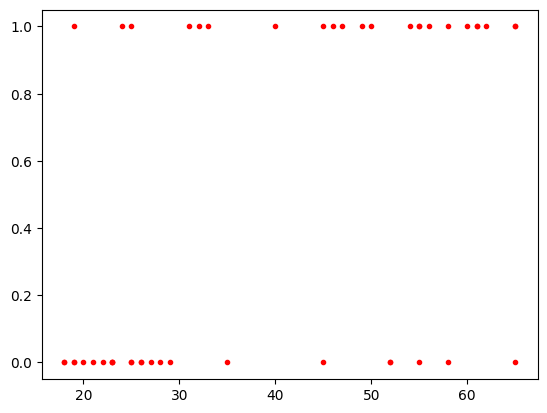

In [6]:
plt.scatter(df.age, df.bought_insurance, marker='.', color='red')

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, train_size=0.9)

In [9]:
X_train

age
44   19
6    55
31   35
38   65
21   26
41   55
42   45
39   52
46   31
1    25
20   21
37   61
16   25
28   25
30   65
25   54
8    62
32   33
14   49
24   50
34   26
29   19
27   58
5    56
18   19
36   24
0    22
22   40
9    61
35   65
15   55
10   18
45   23
33   32
12   27
40   23
7    60
23   45
19   18
4    46
11   28
2    47

In [10]:
X_test

age
3    52
13   29
26   23
17   58
43   20

In [11]:
X_train.shape

(42, 1)

In [12]:
X_test.shape

(5, 1)

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [14]:
model.fit(X_train,y_train)

LogisticRegression()

In [15]:
model.predict(X_test)

array([1, 0, 0, 1, 0])

In [16]:
y_test

3     0
13    0
26    0
17    1
43    0
Name: bought_insurance, dtype: int64

In [19]:
model.score(X_train,y_train)

0.7380952380952381

In [20]:
model.score(X_test,y_test)

0.8

In [21]:
X_test

age
3    52
13   29
26   23
17   58
43   20

In [22]:
model.predict_proba(X_test)
# [not buy , buy]

array([[0.27255163, 0.72744837],
       [0.64279381, 0.35720619],
       [0.73044354, 0.26955646],
       [0.19923568, 0.80076432],
       [0.76880142, 0.23119858]])

In logistic regression we wont be using least squares, we will use ***"MAXIMUM LIKELIHOOD"***

In [24]:
hrdf = pd.read_csv('HR_comma_sep.csv')

In [25]:
hrdf.head(10)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   
5                0.41             0.50               2                   153   
6                0.10             0.77               6                   247   
7                0.92             0.85               5                   259   
8                0.89             1.00               5                   224   
9                0.42             0.53               2                   142   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   
5                   3              0     1                      0      sales   
6                   4              0     1                      0      sales   
7                   5              0     1                      0      sales   
8                   5              0     1                      0      sales   
9                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low  
5     low  
6     low  
7     low  
8     low  
9     low

In [26]:
hrdf.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [27]:
hrdf.left.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [28]:
# Group by salary and calculate retention rate
salary_retention = hrdf.groupby('salary')['left'].mean()

In [29]:
salary_retention

salary
high      0.066289
low       0.296884
medium    0.204313
Name: left, dtype: float64

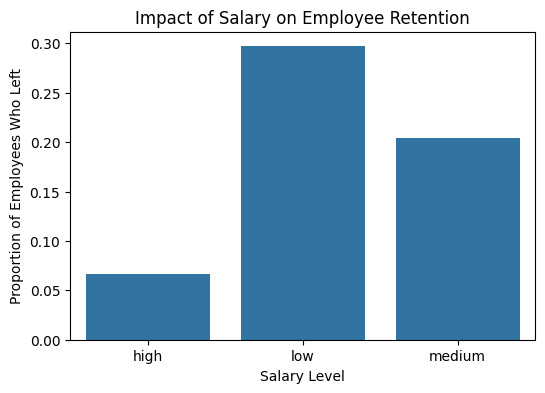

In [30]:
plt.figure(figsize=(6, 4))
sns.barplot(x=salary_retention.index, y=salary_retention.values)
plt.title('Impact of Salary on Employee Retention')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees Who Left')
plt.show()


In [31]:
# Group by department and calculate retention rate
dept_retention = hrdf.groupby('Department')['left'].mean()

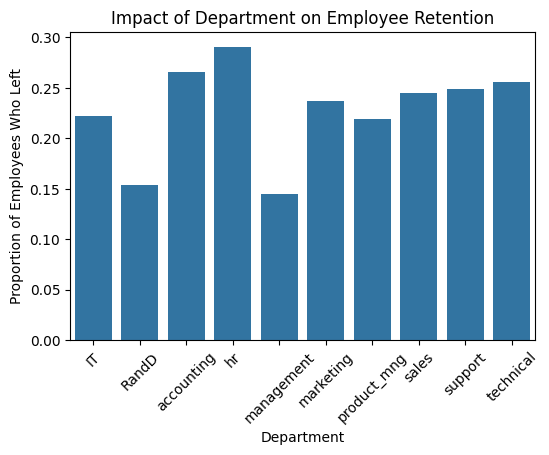

In [32]:
# Plot bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=dept_retention.index, y=dept_retention.values)
plt.title('Impact of Department on Employee Retention')
plt.xlabel('Department')
plt.ylabel('Proportion of Employees Who Left')
plt.xticks(rotation=45)
plt.show()

In [33]:
model = LogisticRegression()

In [34]:
X_new = hrdf.drop('left', axis=1)
y_new = hrdf.left

In [35]:
model.fit(X_new,y_new)

ValueError: could not convert string to float: 'sales'

In [36]:
# integer encoding
from sklearn.preprocessing import LabelEncoder

In [38]:
salary_mapping = {'low': 0, 'medium': 1, 'high': 2}

hrdf['salary_encoded'] = hrdf['salary'].map(salary_mapping)

In [39]:
hrdf

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years Department  salary  salary_encoded  
0                          0      sales     low               0  
1                          0      sales  medium               1  
2                          0      sales  medium               1  
3                          0      sales     low               0  
4                          0      sales     low               0  
...                      ...        ...     ...             ...  
14994                      0    support     low               0  
14995                      0    support     low               0  
14996                      0    support     low               0  
14997                      0    support     low               0  
14998                      0    support     low               0  

[14999 rows x 11 columns]

In [41]:
hrdf

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years Department  salary_encoded  
0                          0      sales               0  
1                          0      sales               1  
2                          0      sales               1  
3                          0      sales               0  
4                          0      sales               0  
...                      ...        ...             ...  
14994                      0    support               0  
14995                      0    support               0  
14996                      0    support               0  
14997                      0    support               0  
14998                      0    support               0  

[14999 rows x 10 columns]

In [40]:
hrdf.drop('salary' , axis=1 , inplace=True)

In [42]:
hrdf.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [43]:
from sklearn.preprocessing import OneHotEncoder

dummy = pd.get_dummies(hrdf['Department'])

In [44]:
dummy

IT  RandD  accounting     hr  management  marketing  product_mng  \
0      False  False       False  False       False      False        False   
1      False  False       False  False       False      False        False   
2      False  False       False  False       False      False        False   
3      False  False       False  False       False      False        False   
4      False  False       False  False       False      False        False   
...      ...    ...         ...    ...         ...        ...          ...   
14994  False  False       False  False       False      False        False   
14995  False  False       False  False       False      False        False   
14996  False  False       False  False       False      False        False   
14997  False  False       False  False       False      False        False   
14998  False  False       False  False       False      False        False   

       sales  support  technical  
0       True    False      False  
1       True    False      False  
2       True    False      False  
3       True    False      False  
4       True    False      False  
...      ...      ...        ...  
14994  False     True      False  
14995  False     True      False  
14996  False     True      False  
14997  False     True      False  
14998  False     True      False  

[14999 rows x 10 columns]

In [46]:
hrdf = pd.concat([hrdf, dummy], axis=1) # Use concat to combine DataFrames along the columns (axis=1)
hrdf

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years Department  salary_encoded     IT  RandD  \
0                          0      sales               0  False  False   
1                          0      sales               1  False  False   
2                          0      sales               1  False  False   
3                          0      sales               0  False  False   
4                          0      sales               0  False  False   
...                      ...        ...             ...    ...    ...   
14994                      0    support               0  False  False   
14995                      0    support               0  False  False   
14996                      0    support               0  False  False   
14997                      0    support               0  False  False   
14998                      0    support               0  False  False   

       accounting     hr  management  marketing  product_mng  sales  support  \
0           False  False       False      False        False   True    False   
1           False  False       False      False        False   True    False   
2           False  False       False      False        False   True    False   
3           False  False       False      False        False   True    False   
4           False  False       False      False        False   True    False   
...           ...    ...         ...        ...          ...    ...      ...   
14994       False  False       False      False        False  False     True   
14995       False  False       False      False        False  False     True   
14996       False  False       False      False        False  False     True   
14997       False  False       False      False        False  False     True   
14998       False  False       False      False        False  False     True   

       technical  
0          False  
1          False  
2          False  
3          False  
4          False  
...          ...  
14994      False  
14995      False  
14996      False  
14997      False  
14998      False  

[14999 rows x 20 columns]

In [47]:
hrdf.drop('Department', axis=1, inplace=True)
hrdf


satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years  salary_encoded     IT  RandD  accounting     hr  \
0                          0               0  False  False       False  False   
1                          0               1  False  False       False  False   
2                          0               1  False  False       False  False   
3                          0               0  False  False       False  False   
4                          0               0  False  False       False  False   
...                      ...             ...    ...    ...         ...    ...   
14994                      0               0  False  False       False  False   
14995                      0               0  False  False       False  False   
14996                      0               0  False  False       False  False   
14997                      0               0  False  False       False  False   
14998                      0               0  False  False       False  False   

       management  marketing  product_mng  sales  support  technical  
0           False      False        False   True    False      False  
1           False      False        False   True    False      False  
2           False      False        False   True    False      False  
3           False      False        False   True    False      False  
4           False      False        False   True    False      False  
...           ...        ...          ...    ...      ...        ...  
14994       False      False        False  False     True      False  
14995       False      False        False  False     True      False  
14996       False      False        False  False     True      False  
14997       False      False        False  False     True      False  
14998       False      False        False  False     True      False  

[14999 rows x 19 columns]

In [48]:


X = hrdf.drop('left', axis=1)
y = hrdf['left']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)
model = LogisticRegression()
model.fit(X_train,y_train)
model.predict(X_test)
model.score(X_test, y_test)


0.7893333333333333

*Multiclass Logistic Regression*

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
digits = load_digits()

In [54]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [58]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [60]:
digits.images.shape

(1797, 8, 8)

In [61]:
digits.images[0].size

64

In [62]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [63]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

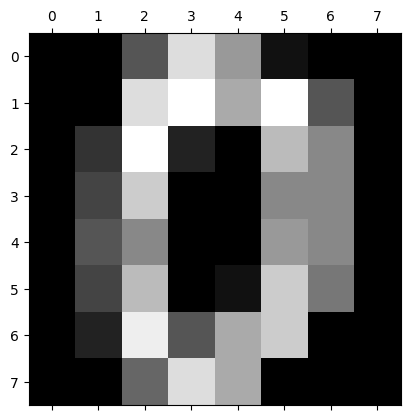

In [65]:
plt.gray()
plt.matshow(digits.images[0])

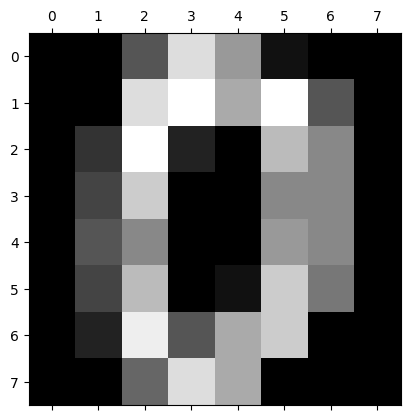

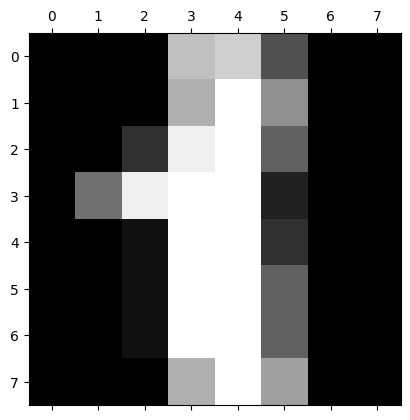

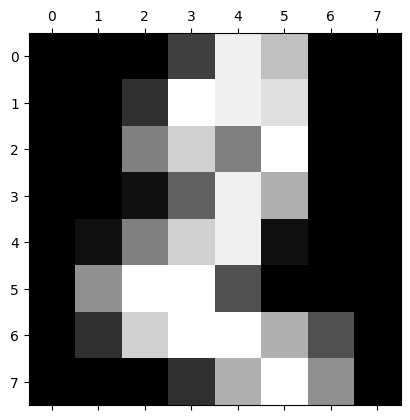

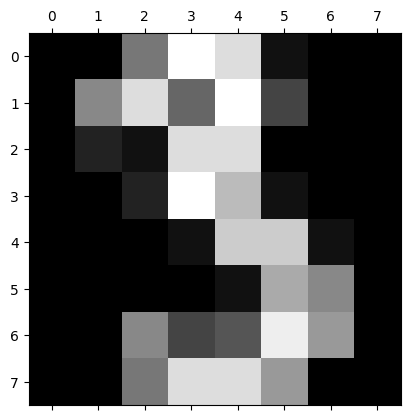

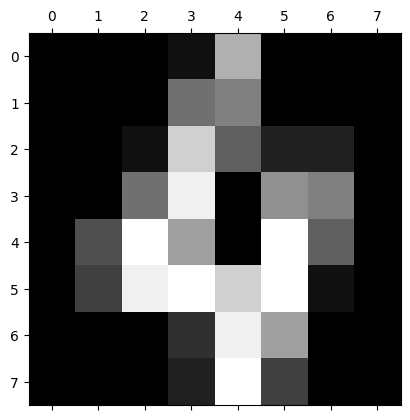

In [72]:
for i in range(5):
  plt.matshow(digits.images[i])
  digits.target[i]


In [71]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [75]:
len(X_train)

1437

In [76]:
len(X_test)

360

In [77]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [81]:
model.fit(X_train, y_train)

LogisticRegression()

In [82]:
model.score(X_test, y_test)

0.975

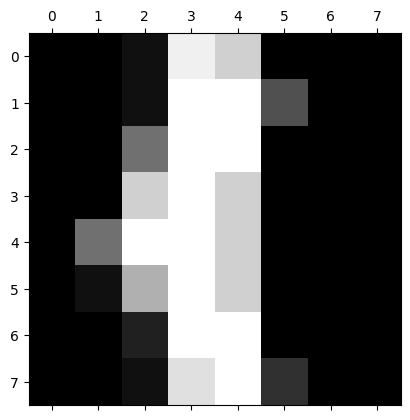

In [83]:
plt.matshow(digits.images[99])

In [84]:
digits.target[99]

np.int64(1)

In [87]:
model.predict([digits.data[99]])

array([1])

In [89]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [95]:
y_predicted = model.predict(X_test)

In [94]:
from sklearn.metrics import confusion_matrix

In [96]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 31,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 33,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  1, 33,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 39,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 31]])

Text(95.72222222222221, 0.5, 'Truth')

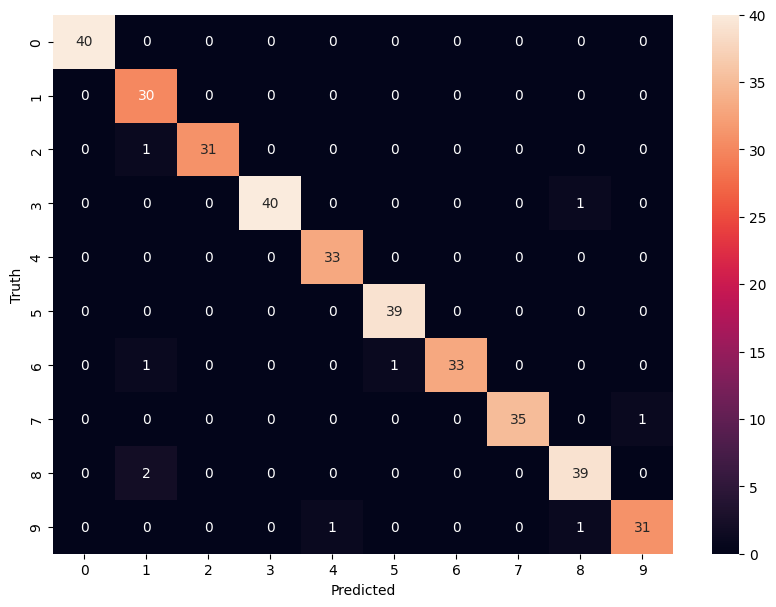

In [98]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [99]:
from sklearn.datasets import load_iris
iris = load_iris()

In [100]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

In [102]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [112]:
iris.target[135]

np.int64(2)

In [107]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [114]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9666666666666667